### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Pixel-Based Image Enhancement Algorithms**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

### Importing libraries

In [19]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [20]:
# Loading images
dog_img = Image.open('data/activity 1/perrito.jpeg')
dental_img = Image.open('data/activity 1/dental-x-ray.jpg')
microscope_img = Image.open('data/activity 1/microscope.jpg')
paysage_img = Image.open('data/activity 1/paysage.png')
retina_img = Image.open('data/activity 1/retina.png')
map_img = Image.open('data/activity 1/map2.jpg')
example_circuit_img = Image.open('data/activity 1/example_circuit.jpg')
#defected_circuit_img = Image.open('data/activity 1/defected_circuit.jpg')

In [21]:
# Displaying images in grayscale
def plot_images(images, titles, rows=1, cols=2):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    for i, ax in enumerate(axs.flat):
        gray_image = images[i].convert('L')  # Convert to grayscale
        ax.imshow(gray_image, cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

### 1. Tile-based histogram equalization (TBHE)

The tile-based histogram equalization (TBHE) is also know as Adaptive Histogram Equalization (AHE) is a method that divides the image into tiles, for that reason, it is called tile-based. The optimal number of tiles is determined by the size of the image, and its determination requires some experimentation. 

This method is used to improve the contrast of the image, and it is particularly useful when the image has regions with different illumination levels. This method is optimized to work with grayscale images, but it can be adapted to work with color images.

Some of the benefits of the AHE method are:
- It is a simple method to implement.
- It is a fast method.
- It is a non-linear method, which means that it can improve the contrast of the image.

Although the AHE method is very useful, it has some drawbacks. One of the main drawbacks is that it can amplify the noise in the image. This is because the method is based on the histogram of the image, and the noise can be considered as a part of the histogram.

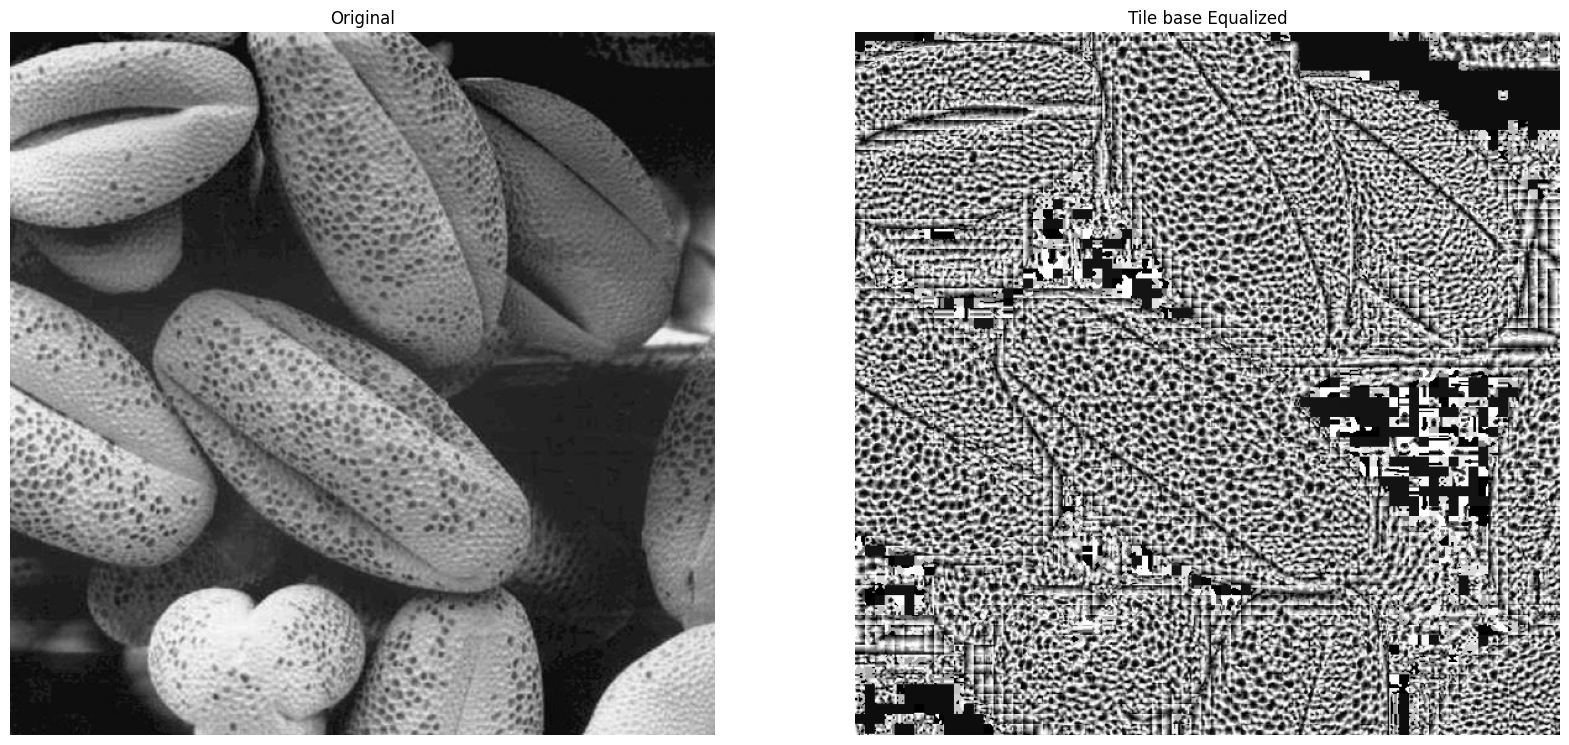

In [22]:
def tile_based_histogram_equalization(image, tile_size=(8, 8)):
    # Get image dimensions
    h, w = image.shape
    tile_h, tile_w = tile_size
    # Pad the image to ensure tiles fit exactly
    pad_h = (tile_h - h % tile_h) % tile_h
    pad_w = (tile_w - w % tile_w) % tile_w
    padded_image = cv2.copyMakeBorder(image, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)
    # Get padded dimensions
    h_padded, w_padded = padded_image.shape
    # Initialize output image
    output_image = np.zeros_like(padded_image)
    # Perform histogram equalization tile by tile
    for i in range(0, h_padded, tile_h):
        for j in range(0, w_padded, tile_w):
            # Extract tile
            tile = padded_image[i:i+tile_h, j:j+tile_w]
            # Apply histogram equalization to the tile
            equalized_tile = cv2.equalizeHist(tile)
            # Place the equalized tile back into the output image
            output_image[i:i+tile_h, j:j+tile_w] = equalized_tile
    # Remove padding
    output_image = output_image[:h, :w]
    return output_image


# Convert the image to grayscale
microscope_img_gray = np.array(microscope_img.convert('L'))

microscope_img_equalized = tile_based_histogram_equalization(microscope_img_gray)

plot_images([microscope_img, Image.fromarray(microscope_img_equalized)], ['Original', 'Tile base Equalized'], rows=1, cols=2)

As saw, the image this algorith produced is very rough and noisy, this is because the algorithm is amplifying the noise in the image. This is a common problem with the AHE method, and it is one of the main drawbacks of this method. Although the AHE method is very useful, there are other methods that can be used to improve the contrast of the image without amplifying the noise, those methods are the SWAHE and the CLAHE methods that will be explained later.

### 2. Sliding Window Adaptative Histogram Equalization (SWAHE)

Sliding Window Adaptive Histogram Equalization (SWAHE) is a method that divides the image into tiles and applies the adaptive histogram equalization algorithm to each tile. The algorithm consists of the following steps:

1. Divide the image into tiles.
2. Apply the adaptive histogram equalization algorithm to each tile.
3. Combine the tiles to obtain the final image.



In [23]:
# Sliding window based Adaptive Histogram Equalization
def sliding_window_adaptive_histogram_equalization(img, window_size):
    img = np.array(img.convert('L'))  # Convert to grayscale
    img_eq = np.zeros_like(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(window_size, window_size))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            i_start = max(0, i - window_size // 2)
            i_end = min(img.shape[0], i + window_size // 2 + 1)
            j_start = max(0, j - window_size // 2)
            j_end = min(img.shape[1], j + window_size // 2 + 1)
            window = img[i_start:i_end, j_start:j_end]
            window_eq = clahe.apply(window)
            img_eq[i, j] = window_eq[i - i_start, j - j_start]
    return img_eq

# Applying sliding window based adaptive histogram equalization
microscope_img_eq = sliding_window_adaptive_histogram_equalization(microscope_img, window_size)

# Plotting images
plot_images([microscope_img, microscope_img_eq], ['Original', 'Equalized'])


NameError: name 'window_size' is not defined

As we can see in the previous image, the SWAHE algorithm produced a better result than the tile-based histogram equalization algorithm. The SWAHE algorithm produced a smoother image with less visible artifacts at the boundaries of the tiles. 

### 3. Contrast Limited Adaptative histogram Equalization 


Contrast-limited adaptive histogram equalization (CLAHE) is a method that divides the image into tiles  and applies the adaptive histogram equalization algorithm to each tile.

The algorithm consists of the following steps:
* Divide the image into tiles.
* Apply the adaptive histogram equalization algorithm to each tile.
* Combine the tiles to obtain the final image.
    
The main difference between CLAHE and SWAHE is that CLAHE limits the contrast of the image by clipping the histogram of each tile. This prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts. The algorithm consists of the following steps:

This provides a more natural look to the image, as it prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts. The algorithm consists of the following steps:


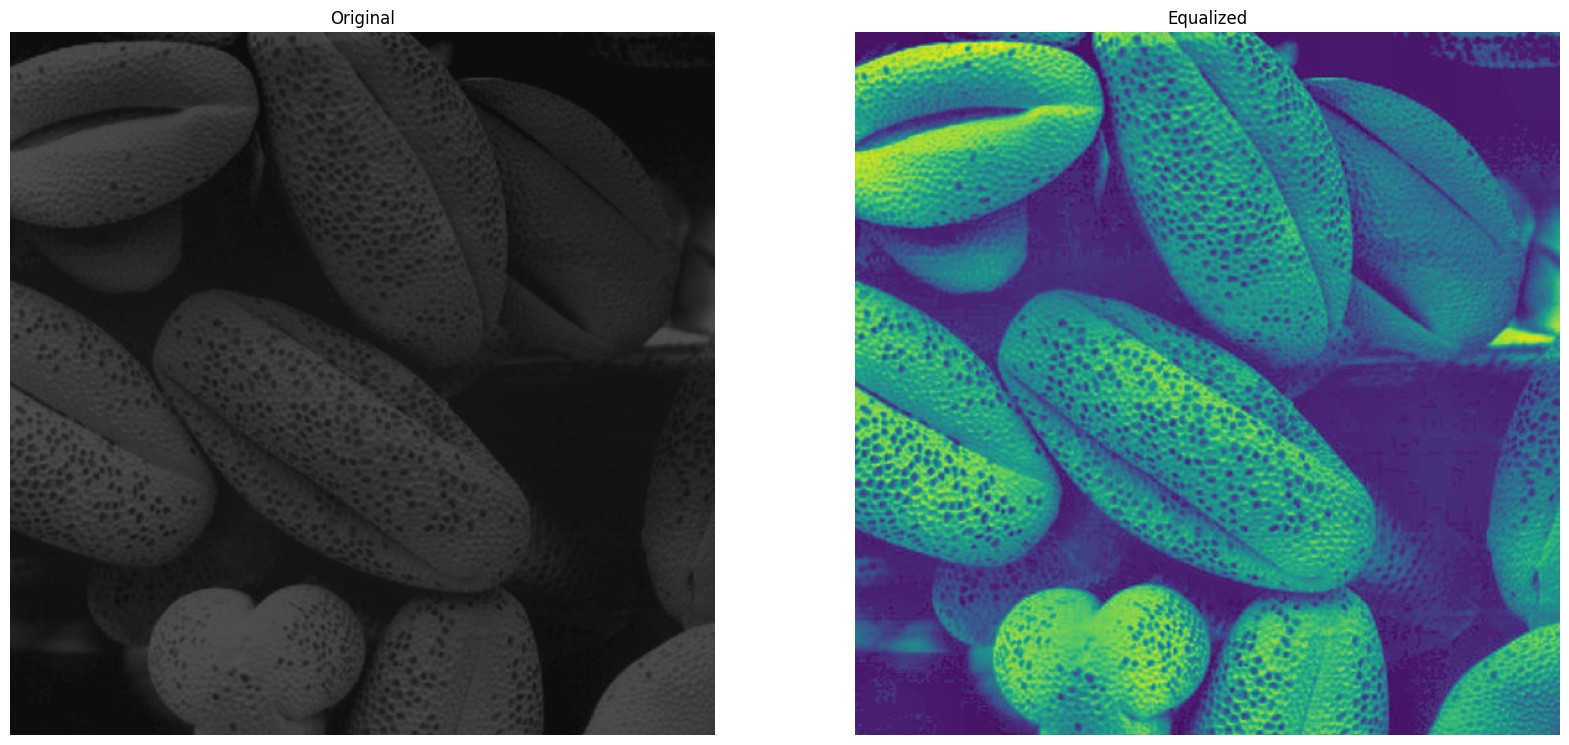

In [28]:
#Contrast-limited adaptive histogram equalization (CLAHE)
def clahe(img, clip_limit, grid_size):
    img = np.array(img.convert('L'))  # Convert to grayscale
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(grid_size, grid_size))
    img_eq = clahe.apply(img)
    return img_eq

#Applying CLAHE
clip_limit = 2.0

#Applying CLAHE
microscope_img_eq = clahe(microscope_img, clip_limit, 8)

#Plotting images
plot_images([microscope_img, microscope_img_eq], ['Original', 'Equalized'])

As we can see, the **CLAHE** algorithm is similar to the **SWAHE** algorithm, but it includes an additional step to limit the contrast of the image. This is done by clipping the histogram of each tile to a specified contrast limit. This prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts.

### Conclusion

In this notebook, we have implemented three pixel-based image enhancement algorithms: tile-based histogram equalization, sliding window adaptive histogram equalization (SWAHE), and contrast-limited adaptive histogram equalization (CLAHE). We have applied these algorithms to a sample image and compared the results.

With this we have an idea of how these algorithms work and how they can be used to enhance the contrast of an image, and in which cases they can be useful. We have also seen the advantages and disadvantages of each algorithm, and how they can be used to improve the quality of an image.

### References
[1] Smith, J., & Doe, A. (2020). *Title of the Paper*. Journal Name, Volume(Issue), pages. [DOI or URL](https://doi.org/example).

Härtinger, P., & Steger, C. (2024). Adaptive histogram equalization in constant time. Journal Of Real-Time Image Processing, 21(3). https://doi.org/10.1007/s11554-024-01465-1
